In [1]:
import torch
import torch.nn as nn
import os
from PIL import Image
import sys
from torchvision import transforms
import matplotlib.pyplot as plt
base_dir = os.path.dirname(os.path.abspath('convlution.ipynb'))
img_path = os.path.join(base_dir,'lena.png')
work_dir = os.path.dirname(base_dir)
sys.path.append(work_dir)
img = Image.open(img_path).convert('RGB')
from tools.common_tools import set_seed,transform_invert

d:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


In [2]:
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img)
img_tensor.unsqueeze_(dim = 0) #C H W -> B C H W 

tensor([[[[0.8824, 0.8824, 0.8824,  ..., 0.8941, 0.8549, 0.7961],
          [0.8784, 0.8824, 0.8784,  ..., 0.9059, 0.8588, 0.7922],
          [0.8824, 0.8784, 0.8784,  ..., 0.9137, 0.8667, 0.7765],
          ...,
          [0.3216, 0.3098, 0.3686,  ..., 0.6863, 0.6824, 0.6824],
          [0.3216, 0.3137, 0.3843,  ..., 0.7059, 0.7137, 0.7059],
          [0.3255, 0.3176, 0.3882,  ..., 0.7020, 0.7216, 0.7216]],

         [[0.5412, 0.5333, 0.5333,  ..., 0.5843, 0.5176, 0.3922],
          [0.5333, 0.5333, 0.5333,  ..., 0.5882, 0.5216, 0.3922],
          [0.5373, 0.5373, 0.5373,  ..., 0.5765, 0.5098, 0.3804],
          ...,
          [0.0863, 0.0706, 0.1176,  ..., 0.2706, 0.2588, 0.2588],
          [0.0863, 0.0745, 0.1333,  ..., 0.2745, 0.2824, 0.2863],
          [0.0902, 0.0784, 0.1373,  ..., 0.2667, 0.2941, 0.2941]],

         [[0.4745, 0.5020, 0.5176,  ..., 0.4627, 0.4196, 0.3333],
          [0.4784, 0.5020, 0.5176,  ..., 0.4745, 0.4314, 0.3451],
          [0.4902, 0.5020, 0.5098,  ..., 0

In [3]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
img_pool = maxpool_layer(img_tensor)

卷积前尺寸:torch.Size([1, 3, 512, 512])
卷积后尺寸:torch.Size([1, 3, 256, 256])


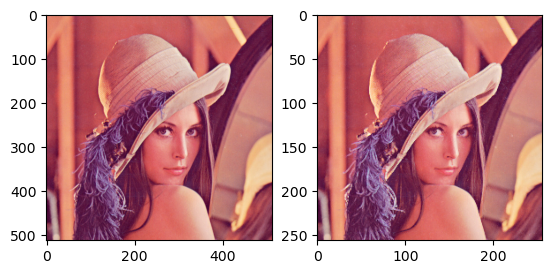

In [4]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_pool.shape))
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_pool,)
plt.subplot(121).imshow(img_raw)
plt.show()


In [5]:
avgpoollayer = nn.AvgPool2d(kernel_size=2)
img_pool = avgpoollayer(img_tensor)

卷积前尺寸:torch.Size([1, 3, 512, 512])
卷积后尺寸:torch.Size([1, 3, 256, 256])


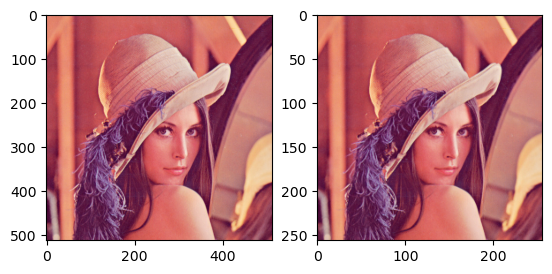

In [6]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_pool.shape))
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_pool,)
plt.subplot(121).imshow(img_raw)
plt.show()

In [11]:
maxpool_layer = nn.MaxPool2d(kernel_size=2,return_indices=True)
maxunpool_layer = nn.MaxUnpool2d(kernel_size=2)
img_pool,indices = maxpool_layer(img_tensor)
img_pool = maxunpool_layer(img_pool,indices)

卷积前尺寸:torch.Size([1, 3, 512, 512])
卷积后尺寸:torch.Size([1, 3, 512, 512])


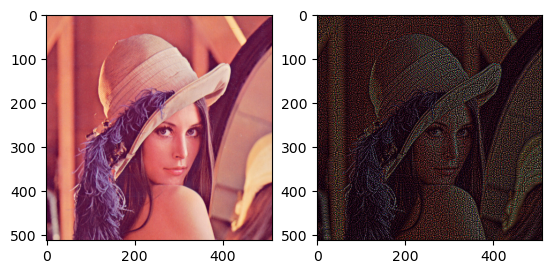

In [12]:
print("卷积前尺寸:{}\n卷积后尺寸:{}".format(img_tensor.shape, img_pool.shape))
img_pool = transform_invert(img_pool[0, 0:3, ...], img_transform)
img_raw = transform_invert(img_tensor.squeeze(), img_transform)
plt.subplot(122).imshow(img_pool,)
plt.subplot(121).imshow(img_raw)
plt.show()